In [2]:
import pandas as pd

In [3]:
yelp = pd.read_csv("../data/yelp.csv")

In [8]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [7]:
yelp.groupby('stars').mean()

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


C:\Users\linje3\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


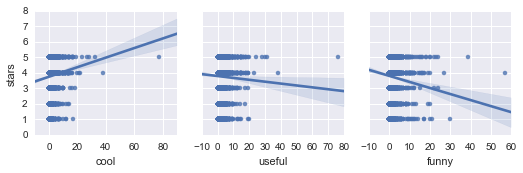

In [10]:
%matplotlib inline
import seaborn as sns
sns.pairplot(yelp, x_vars=['cool', 'useful', 'funny'], y_vars='stars', kind='reg')

In [11]:
#define feature_cols
feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]
y = yelp.stars

In [19]:
#fit linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

C:\Users\linje3\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
#show intercept 
print(linreg.intercept_)
print(linreg.coef_)

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


In [21]:
zip(feature_cols, linreg.coef_)
#why is this happening?

In [24]:
#Evaluate the model by splitting it into training and testing sets and computing the RMSE. 
#Does the RMSE make intuitive sense to you?
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

def yelp_train_test(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    
    #create model, fit
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)
    
    #generate prediction
    y_pred = linreg.predict(X_test)
    
    #return error
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))


In [25]:
print(yelp_train_test(['cool', 'useful', 'funny']))

1.18429052822


In [29]:
#Try removing some of the features and see if the RMSE improves.
print(yelp_train_test(['cool', 'useful']))
print(yelp_train_test(['useful', 'funny']))
print(yelp_train_test(['cool', 'funny']))

1.19623908761
1.20982720239
1.19426732565
